# Import 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_brut = pd.read_csv ('dataimoreg.csv')

In [3]:
df_brut

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


# EDA 12/01


## quick view


In [4]:
#first quick view 
df_brut.describe()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16336.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,10295.498789,-119.564046,35.626523,28.624516,2644.170603,539.319540,1435.017260,501.135962,3.864091,206509.251453
std,5941.973488,2.005033,2.139150,12.597980,2213.946369,425.207704,1158.151967,385.650673,1.893244,115225.957661
min,0.000000,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,5178.750000,-121.790000,33.930000,18.000000,1446.000000,296.000000,788.000000,280.000000,2.562500,119400.000000
50%,10263.500000,-118.490000,34.250000,29.000000,2116.000000,435.000000,1168.000000,410.000000,3.531300,179300.000000
75%,15438.250000,-118.010000,37.710000,37.000000,3154.000000,647.000000,1738.000000,606.000000,4.733225,264500.000000
max,20639.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
#first quick view for types
df_brut.dtypes

Unnamed: 0              int64
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [6]:
df_brut = df_brut.drop(columns=['Unnamed: 0'])

## missing data

In [7]:
#missing data
df_brut.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
#Inputation of missing value by the median 
median = df_brut["total_bedrooms"].median()
df_brut['total_bedrooms'].fillna(median, inplace=True)

In [9]:
df_brut.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Working on duplicate

In [10]:
# df_brut.nunique()

In [11]:
#New col long and lat to see unique place
# cols = ["longitude","latitude"]
# df_brut["longitude,latitude"] = df_brut[cols].apply(lambda row: ' ; '.join(row.values.astype(str)), axis=1)

### def fonction to put numerical value in ocean proximity


In [12]:
# def ocean_proximity_to_num (row):
#     if row["ocean_proximity"] == '<1H OCEAN' :
#         return 0
#     if row["ocean_proximity"] == 'INLAND' :
#         return 1
#     if row["ocean_proximity"] == 'NEAR OCEAN' :
#         return 2
#     if row["ocean_proximity"] == 'NEAR BAY' :
#         return 3
#     if row["ocean_proximity"] == 'ISLAND' :
#         return 4
#     return "NaN"

In [13]:
# def num_to_ocean_proximity (row):
#     if row["num_ocean_proximity"] == 0 :
#         return '<1H OCEAN'
#     if row["num_ocean_proximity"] == 1 :
#         return 'INLAND'
#     if row["num_ocean_proximity"] == 2 :
#         return 'NEAR OCEAN'
#     if row["num_ocean_proximity"] == 3 :
#         return 'NEAR BAY'
#     if row["num_ocean_proximity"] == 4 :
#         return 'ISLAND'
#     return "NaN"

In [14]:
# df_brut["num_ocean_proximity"] = df_brut.apply (lambda row: ocean_proximity_to_num(row),axis=1)


In [15]:
# #checking 
# df_brut["ocean_proximity"].value_counts()

In [16]:
# df_brut["num_ocean_proximity"].value_counts()

In [17]:
# df_duplicate = df_brut[df_brut["longitude,latitude"].duplicated(keep=False)]

In [18]:
# df_duplicate.sort_values("longitude,latitude")

In [19]:
# df_test = df_duplicate.groupby(['longitude,latitude']).mean().reset_index()

In [20]:
# #Drop not usefull column and have back ocean proximity
# df_clean = df_brut.groupby(['longitude,latitude']).mean().reset_index()

# #df_clean = df_clean.drop(columns=['Unnamed: 0',"longitude","latitude"])
# df_clean["ocean_proximity"] = df_clean.apply (lambda row: num_to_ocean_proximity(row),axis=1)

In [21]:
# df_clean['longitude,latitude'].nunique()

## dataframe cleaned 12/01 , checking outliers

In [22]:
#Dataframe i use for model
df_clean = df_brut.copy()

In [23]:
columns_numerical = df_clean.columns[1:8]
columns_numerical

Index(['latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income'],
      dtype='object')

In [24]:
df_clean.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.564046,35.626523,28.624516,2644.170603,538.207607,1435.017260,501.135962,3.864091,206509.251453
std,2.005033,2.139150,12.597980,2213.946369,423.071026,1158.151967,385.650673,1.893244,115225.957661
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1446.000000,297.000000,788.000000,280.000000,2.562500,119400.000000
50%,-118.490000,34.250000,29.000000,2116.000000,435.000000,1168.000000,410.000000,3.531300,179300.000000
75%,-118.010000,37.710000,37.000000,3154.000000,644.000000,1738.000000,606.000000,4.733225,264500.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [25]:
df_clean.sort_values("population").tail(40)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14878,-118.59,34.47,5.0,538.0,98.0,8733.0,105.0,4.2391,154600.0,INLAND
9485,-121.73,37.68,17.0,20354.0,3493.0,8768.0,3293.0,5.4496,238900.0,INLAND
10301,-121.86,37.37,15.0,8162.0,2124.0,8793.0,2086.0,3.3306,210300.0,<1H OCEAN
14136,-117.12,33.49,4.0,21988.0,4055.0,8824.0,3252.0,3.9963,191100.0,<1H OCEAN
14204,-117.92,33.98,10.0,16414.0,2919.0,8907.0,2714.0,6.1552,362500.0,<1H OCEAN
15745,-117.90,34.02,15.0,14058.0,2486.0,8997.0,2497.0,5.0704,226200.0,<1H OCEAN
11707,-118.47,34.23,22.0,8350.0,2717.0,9135.0,2452.0,2.5008,160000.0,<1H OCEAN
12726,-117.27,33.68,8.0,26322.0,4072.0,9360.0,3361.0,5.3238,228900.0,<1H OCEAN
13049,-117.20,33.58,2.0,30450.0,5033.0,9419.0,3197.0,4.5936,174300.0,<1H OCEAN
10398,-117.79,34.02,5.0,18690.0,2862.0,9427.0,2777.0,6.4266,315600.0,<1H OCEAN


###  plot outliers with boxplot


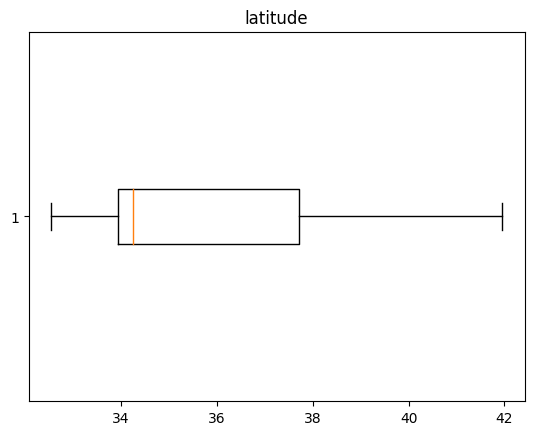

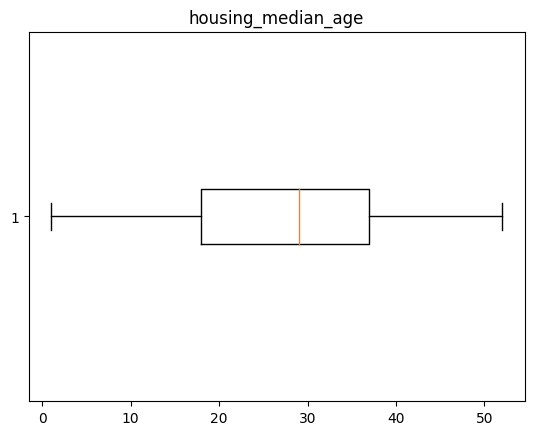

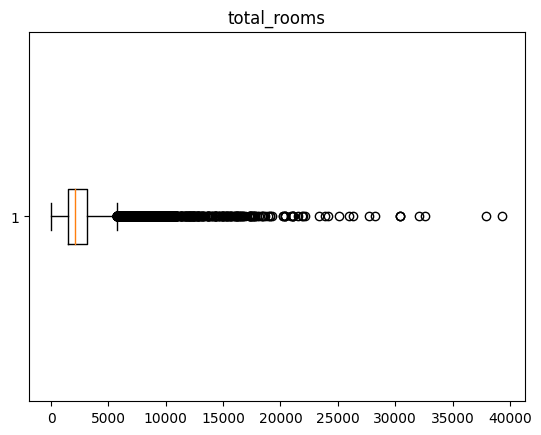

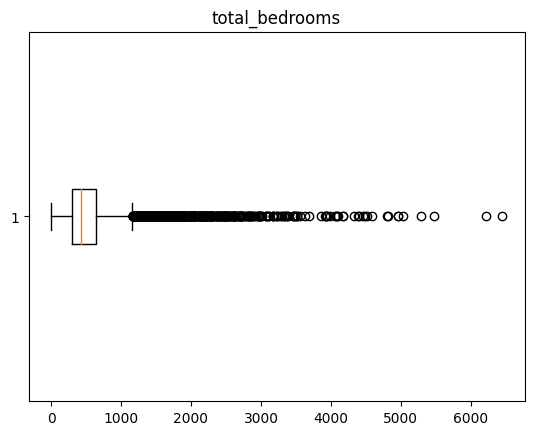

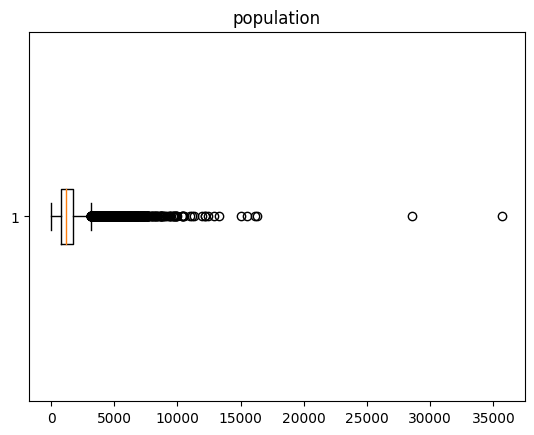

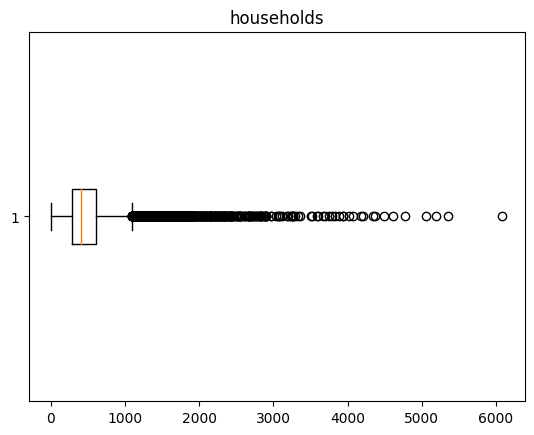

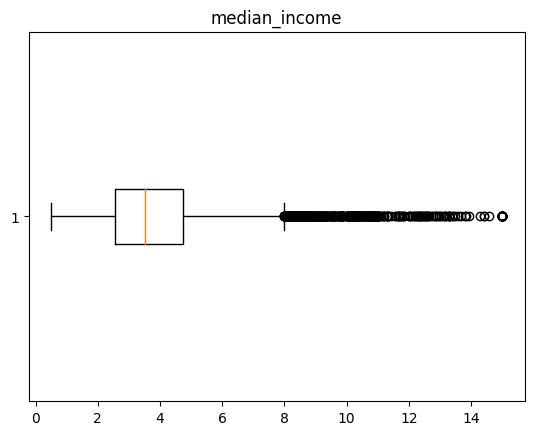

In [26]:
#We see that from all outlier 2 point look really far bigger than other 
for i in columns_numerical :
    
    fig, ax = plt.subplots()
    ax.boxplot(df_clean[i], vert=0)
    plt.title(label=i)
   
    plt.show()

Text(0.5, 1.0, 'population')

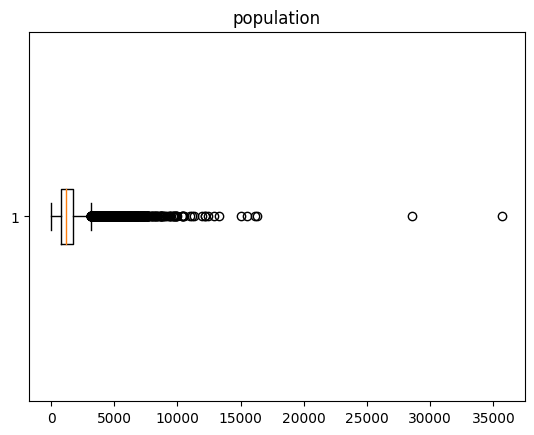

In [27]:
#Let's see what those point are 
fig, ax = plt.subplots()
ax.boxplot(df_clean["population"], vert=0)
plt.title(label="population")

In [28]:
#The 2 location wich are real heavy outlier
df_clean[df_clean["population"] > 20000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7471,-117.42,33.35,14.0,25135.0,4819.0,35682.0,4769.0,2.5729,134400.0,<1H OCEAN
14503,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0,<1H OCEAN


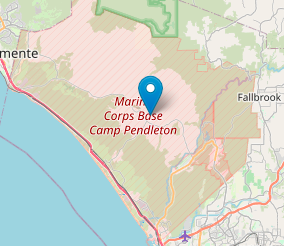

In [29]:
# both this location are military infrastructure , so it's not somthing relevent for house price , we can remove them

from IPython import display
display.Image("https://user-images.githubusercontent.com/104862908/212533897-cfaeeda6-9f09-48aa-a47f-7a6f40cb8dc7.PNG")

In [30]:
#Remove the 2 line 
df_clean = df_clean[df_clean["population"] < 20000]

Text(0.5, 1.0, 'population')

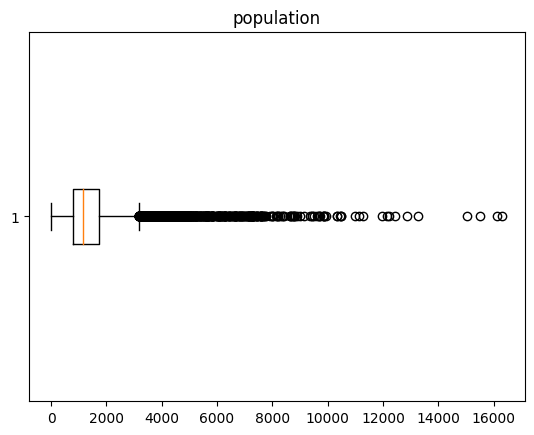

In [31]:
#it improved a lot the boxplot , we will check later if we can improve it more 
fig, ax = plt.subplots()
ax.boxplot(df_clean["population"], vert=0)
plt.title(label="population")

In [32]:
df_clean.housing_median_age.describe()

count    16510.000000
mean        28.626469
std         12.597482
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

In [33]:
columns_numerical 


Index(['latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income'],
      dtype='object')

In [34]:
df_clean_bins = df_clean

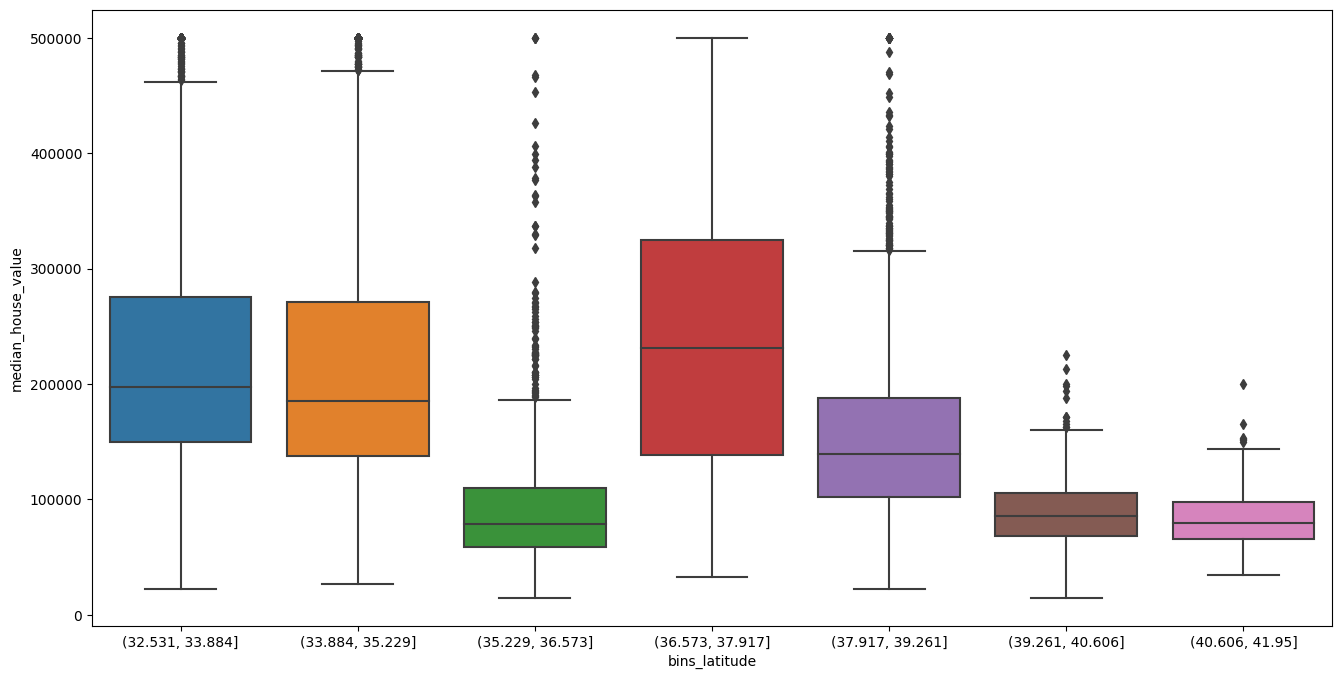

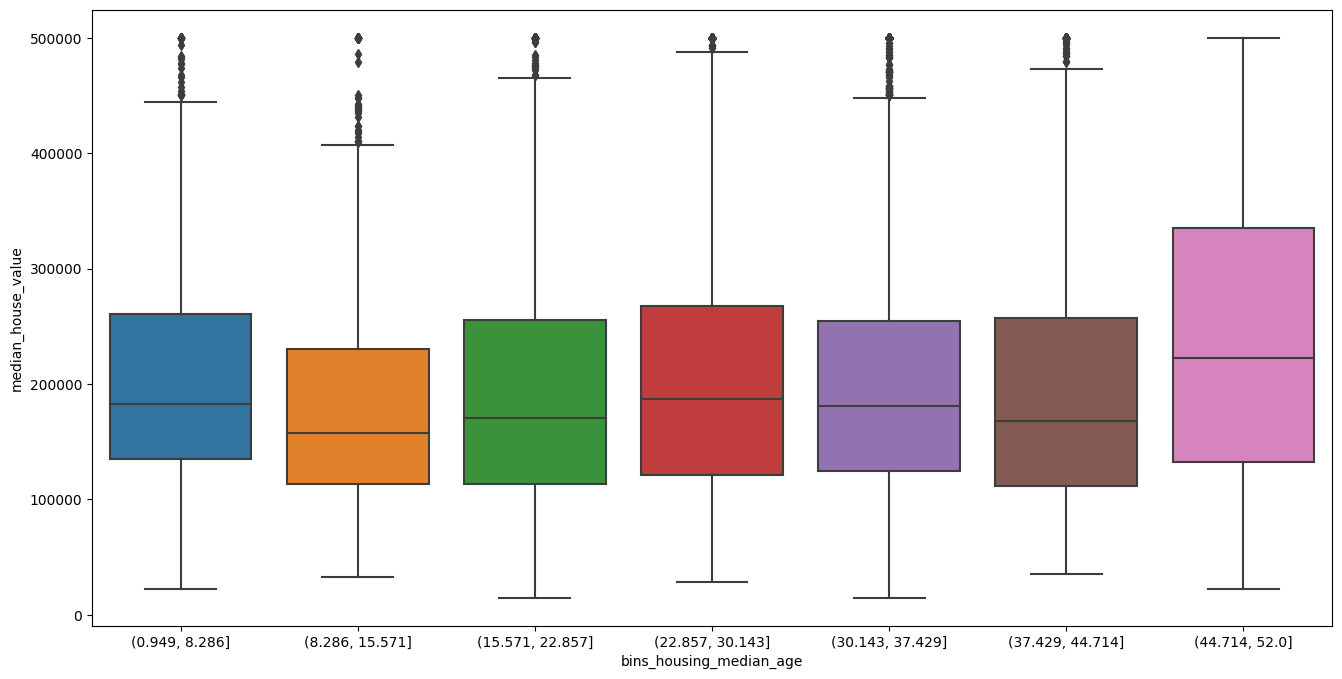

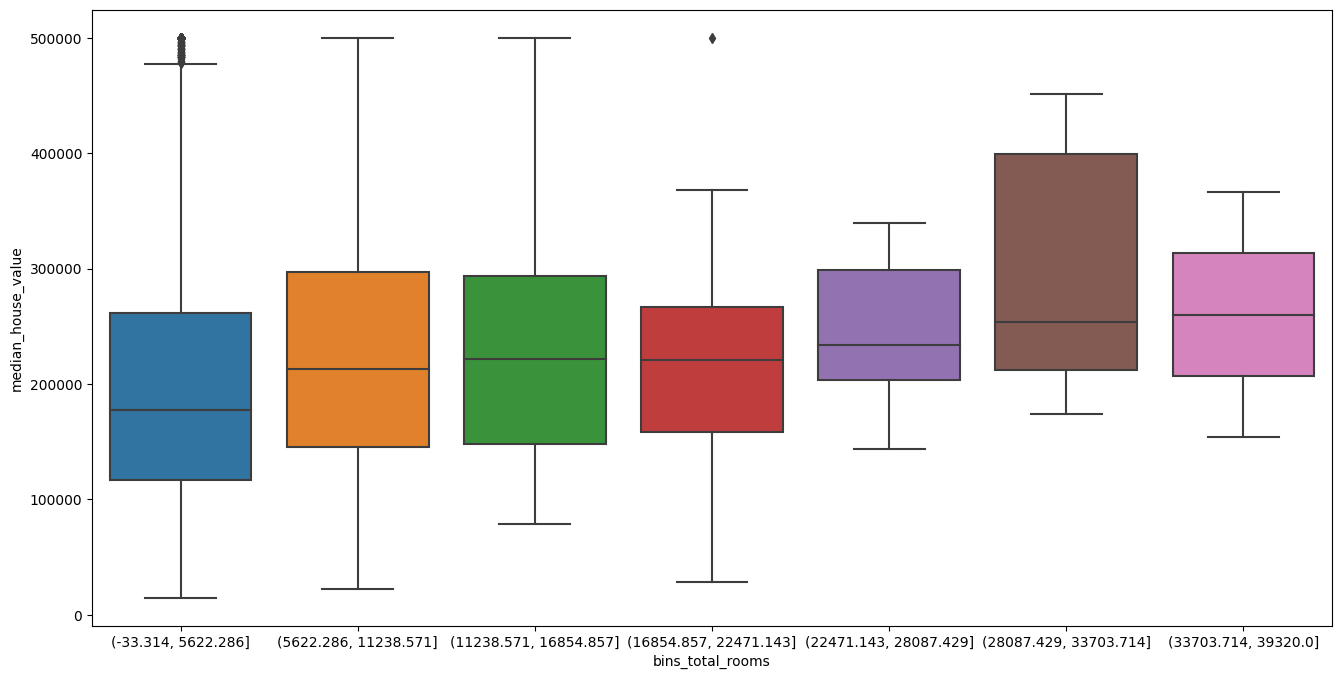

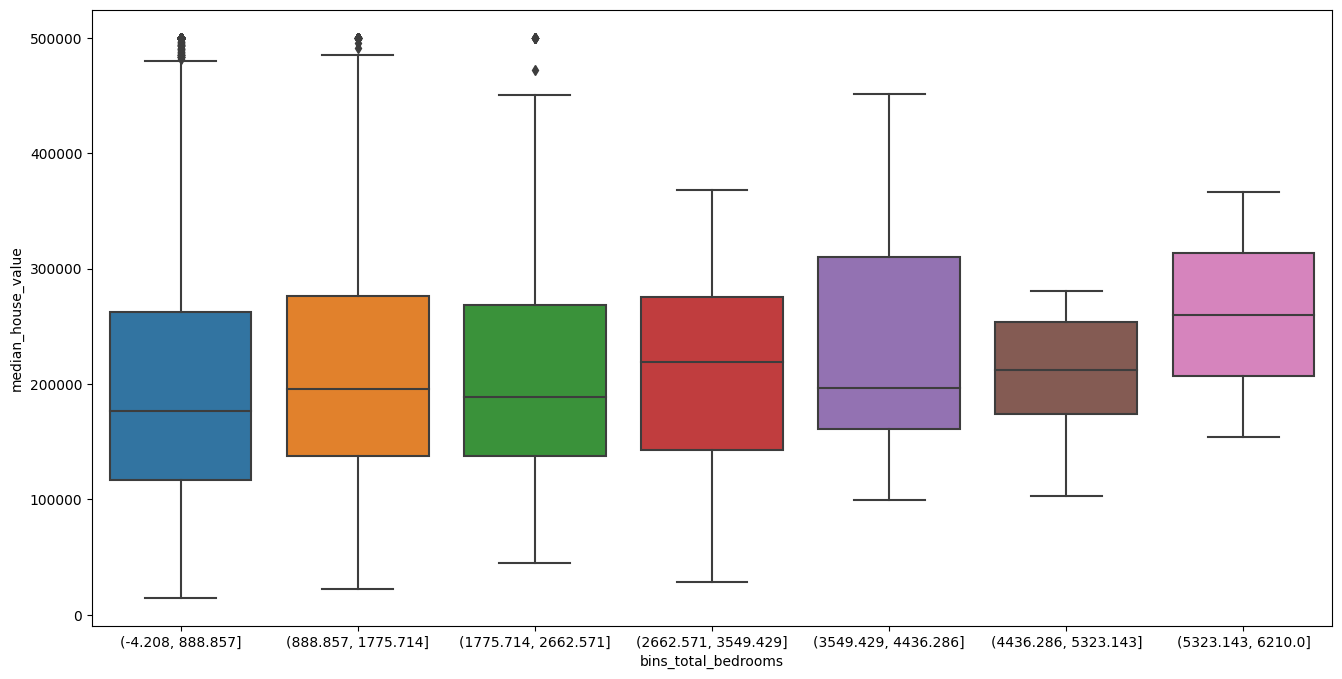

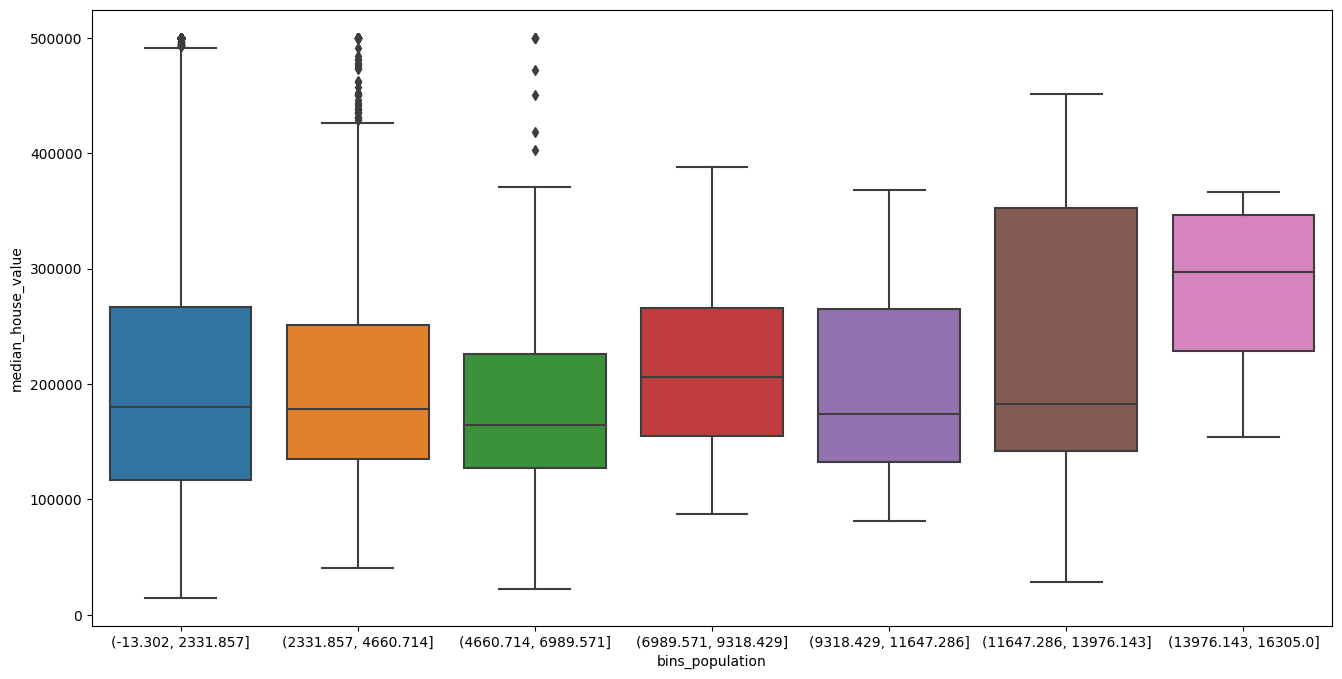

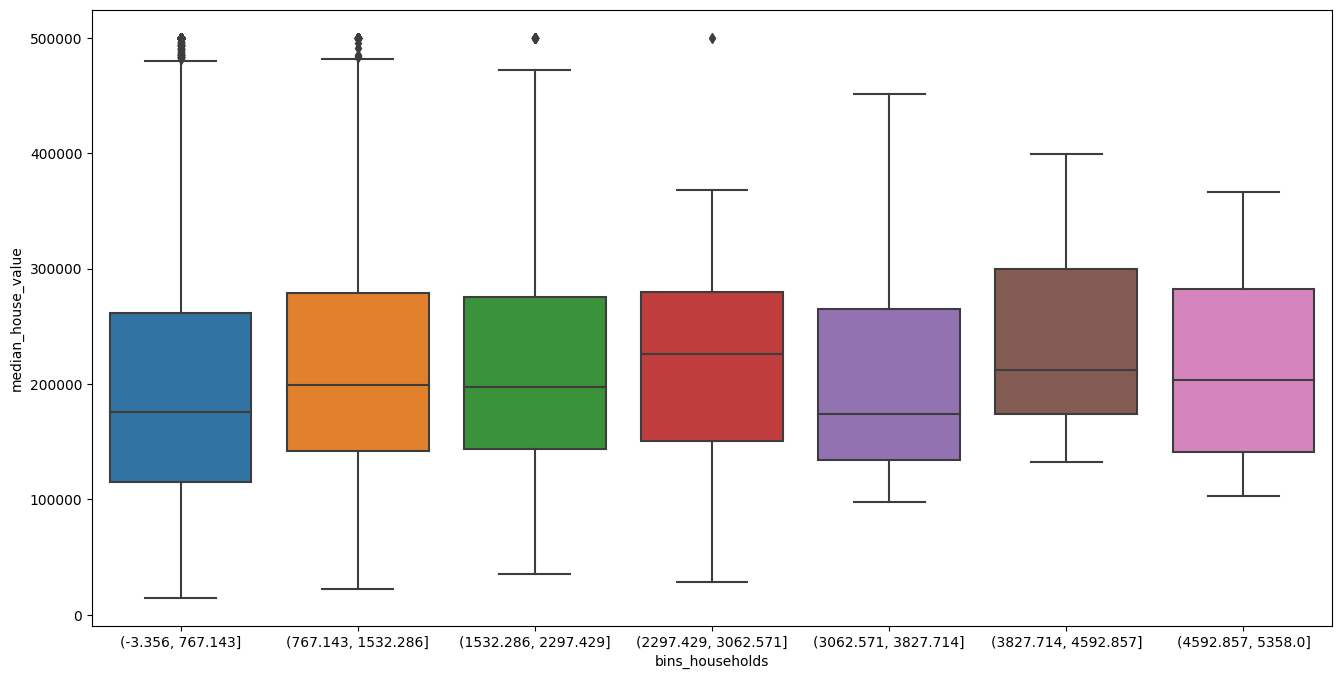

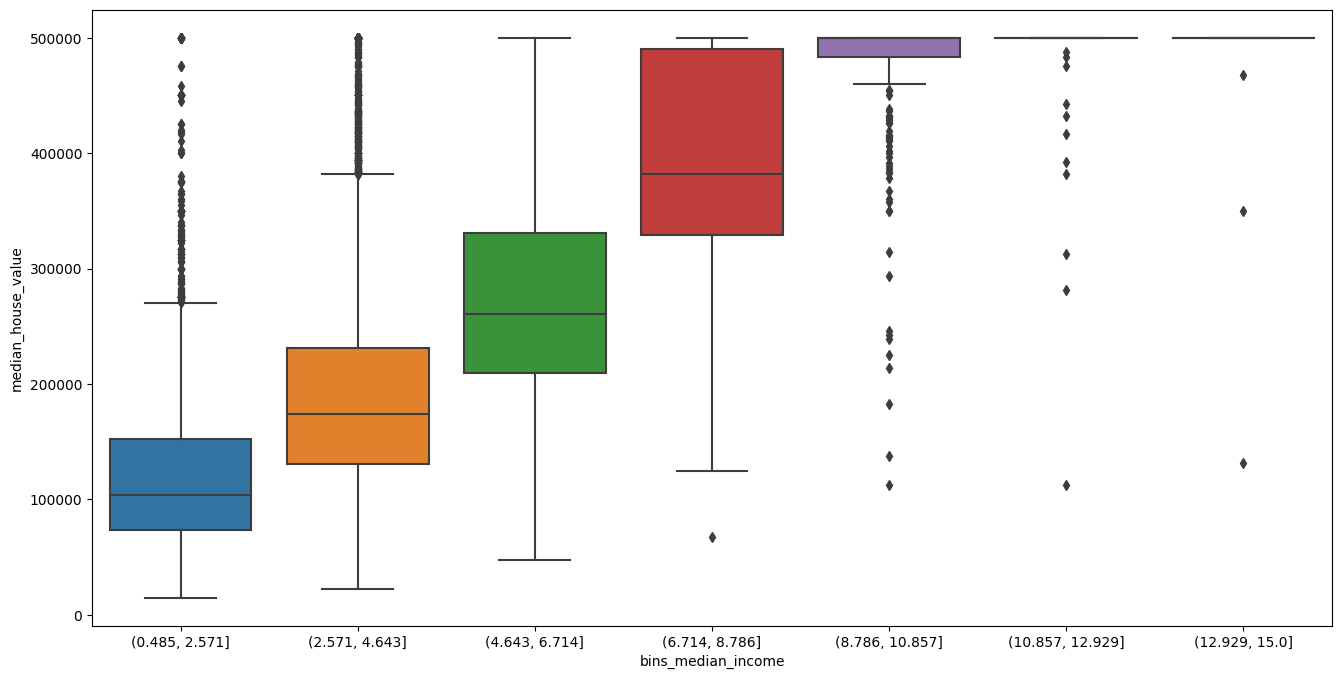

In [35]:
#We are looking for visually how bins of each features impatch the target 
for i in columns_numerical :
    name_col = "bins_" + i
    df_clean_bins[name_col] = pd.cut(df_clean_bins[i] , 7)
    plt.figure(figsize = (16,8))
    sns.boxplot(x = df_clean_bins[name_col] , y = df_clean_bins.median_house_value)
    plt.show()

# Write df clean 

In [36]:
df_clean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bins_latitude,bins_housing_median_age,bins_total_rooms,bins_total_bedrooms,bins_population,bins_households,bins_median_income
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND,"(36.573, 37.917]","(0.949, 8.286]","(-33.314, 5622.286]","(-4.208, 888.857]","(-13.302, 2331.857]","(-3.356, 767.143]","(0.485, 2.571]"
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN,"(32.531, 33.884]","(0.949, 8.286]","(-33.314, 5622.286]","(-4.208, 888.857]","(-13.302, 2331.857]","(-3.356, 767.143]","(6.714, 8.786]"
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND,"(36.573, 37.917]","(22.857, 30.143]","(-33.314, 5622.286]","(-4.208, 888.857]","(-13.302, 2331.857]","(-3.356, 767.143]","(0.485, 2.571]"
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN,"(33.884, 35.229]","(30.143, 37.429]","(-33.314, 5622.286]","(-4.208, 888.857]","(-13.302, 2331.857]","(-3.356, 767.143]","(0.485, 2.571]"
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND,"(36.573, 37.917]","(15.571, 22.857]","(-33.314, 5622.286]","(-4.208, 888.857]","(-13.302, 2331.857]","(-3.356, 767.143]","(2.571, 4.643]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND,"(39.261, 40.606]","(15.571, 22.857]","(-33.314, 5622.286]","(-4.208, 888.857]","(-13.302, 2331.857]","(-3.356, 767.143]","(2.571, 4.643]"
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY,"(37.917, 39.261]","(44.714, 52.0]","(-33.314, 5622.286]","(-4.208, 888.857]","(-13.302, 2331.857]","(-3.356, 767.143]","(2.571, 4.643]"
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND,"(37.917, 39.261]","(15.571, 22.857]","(-33.314, 5622.286]","(-4.208, 888.857]","(-13.302, 2331.857]","(-3.356, 767.143]","(2.571, 4.643]"
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN,"(33.884, 35.229]","(37.429, 44.714]","(-33.314, 5622.286]","(-4.208, 888.857]","(2331.857, 4660.714]","(767.143, 1532.286]","(2.571, 4.643]"


In [37]:
df_clean.to_csv(r'dataframeclean.csv', index=False, header=True)